# **Lab Exam**
## Problem--Wine quality prediction
##Description-Find the attached Excel file having columns:-fixed acidity ,volatile acidity , citric acid, residual sugar,chlorides ,free sulfur dioxide ,total sulfur dioxide, density, pH, sulphates, alcohol, quality.

### 1.Identify which of the features are impacting quality feature of Wine.
### 2.Make just 2 output categories good and bad.Where "bad" category will have quality feature range in [2,6.5] and "good" category will have quality feature range in [6.5 and above ](Hint:you may use pandas.cut() function on quality for the same.)
### 3.Apply gridsearchCV on SVM,TREE based algorithm and ensemble based algorithm to build best model with high f1 score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset=pd.read_csv('Meet Agnihotri - winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print("Quality values:",dataset['quality'].unique())

Quality values: [5 6 7 4 8 3]


Since the split is at 6.5, quality 3-6 will be bad and 7-8 will be good.

In [6]:
print(dataset['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


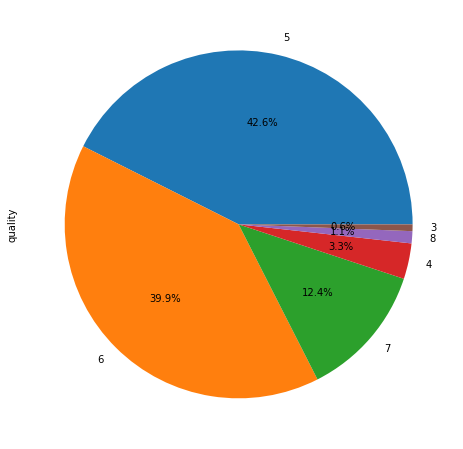

In [7]:
plt.figure(1, figsize=(8,8))
dataset['quality'].value_counts().plot.pie(autopct="%1.1f%%")

This shows some balancing might be needed

In [8]:
print("Totally there are {} null values in the dataset".format(dataset.isnull().sum().sum()))

Totally there are 0 null values in the dataset


Multivariant Plot

In [13]:
def draw_multivariant_plot(dataset, rows, cols, plot_type):
   
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

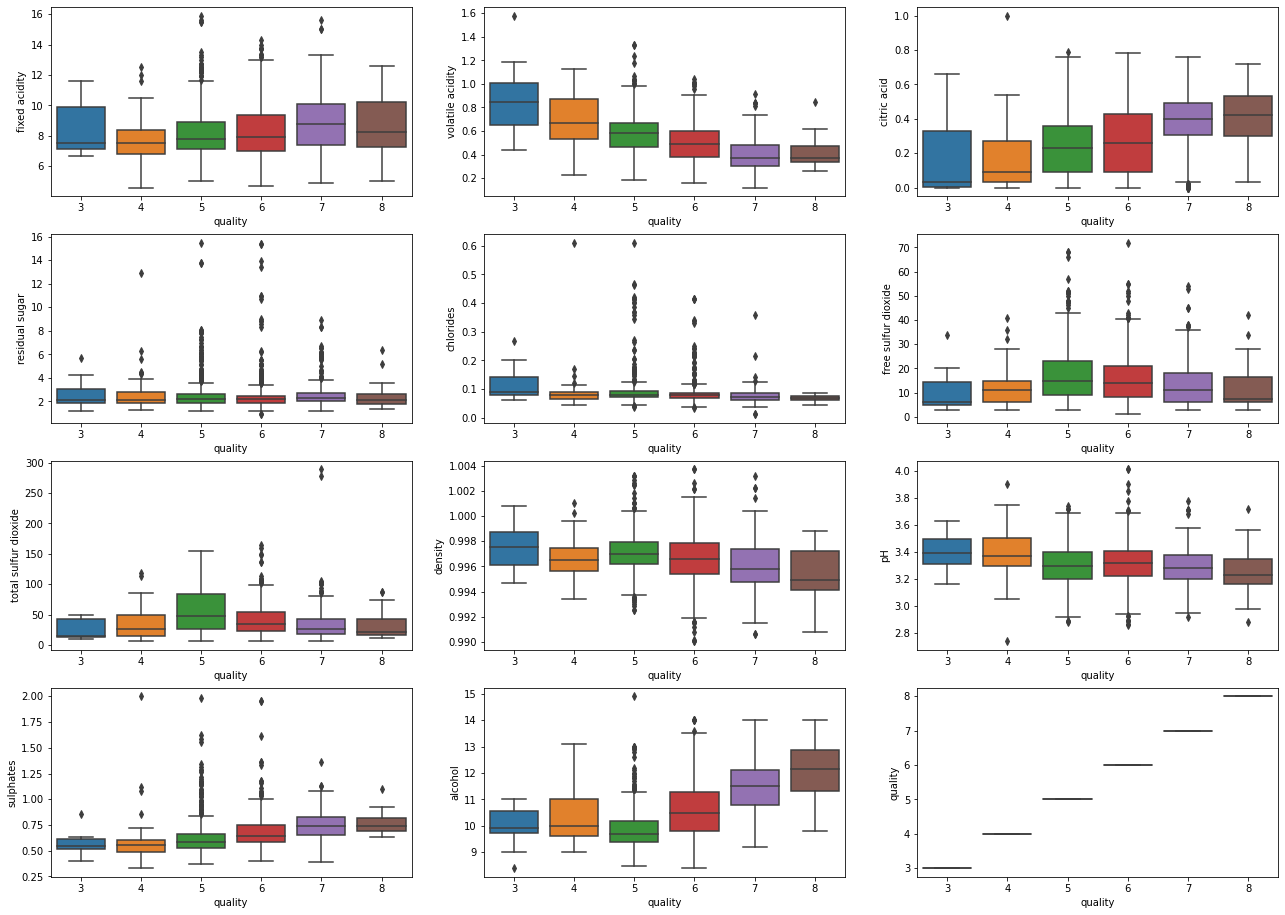

In [14]:
draw_multivariant_plot(dataset,4,3,"box")

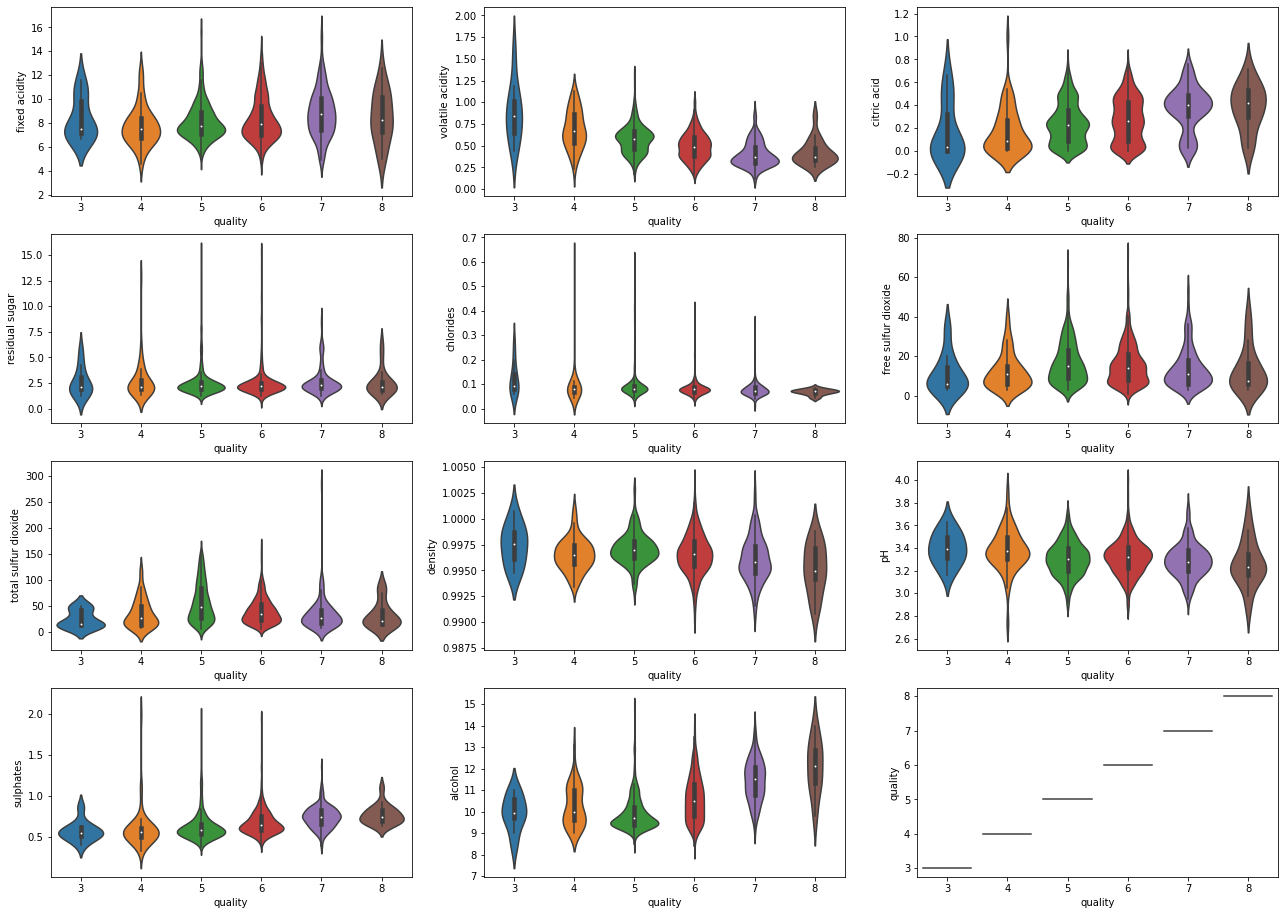

In [15]:
draw_multivariant_plot(dataset,4,3,"violin")

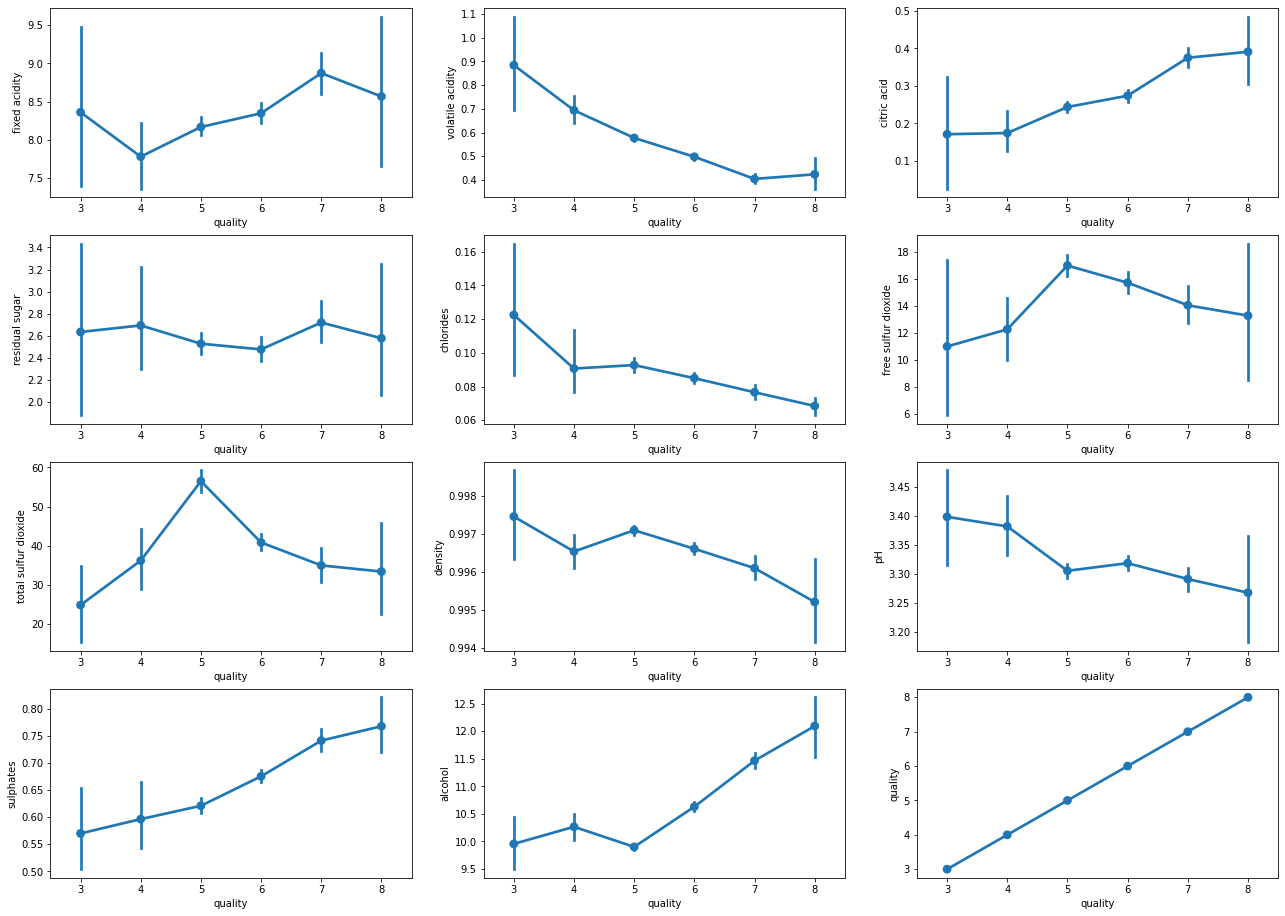

In [16]:
draw_multivariant_plot(dataset,4,3,"pointplot")

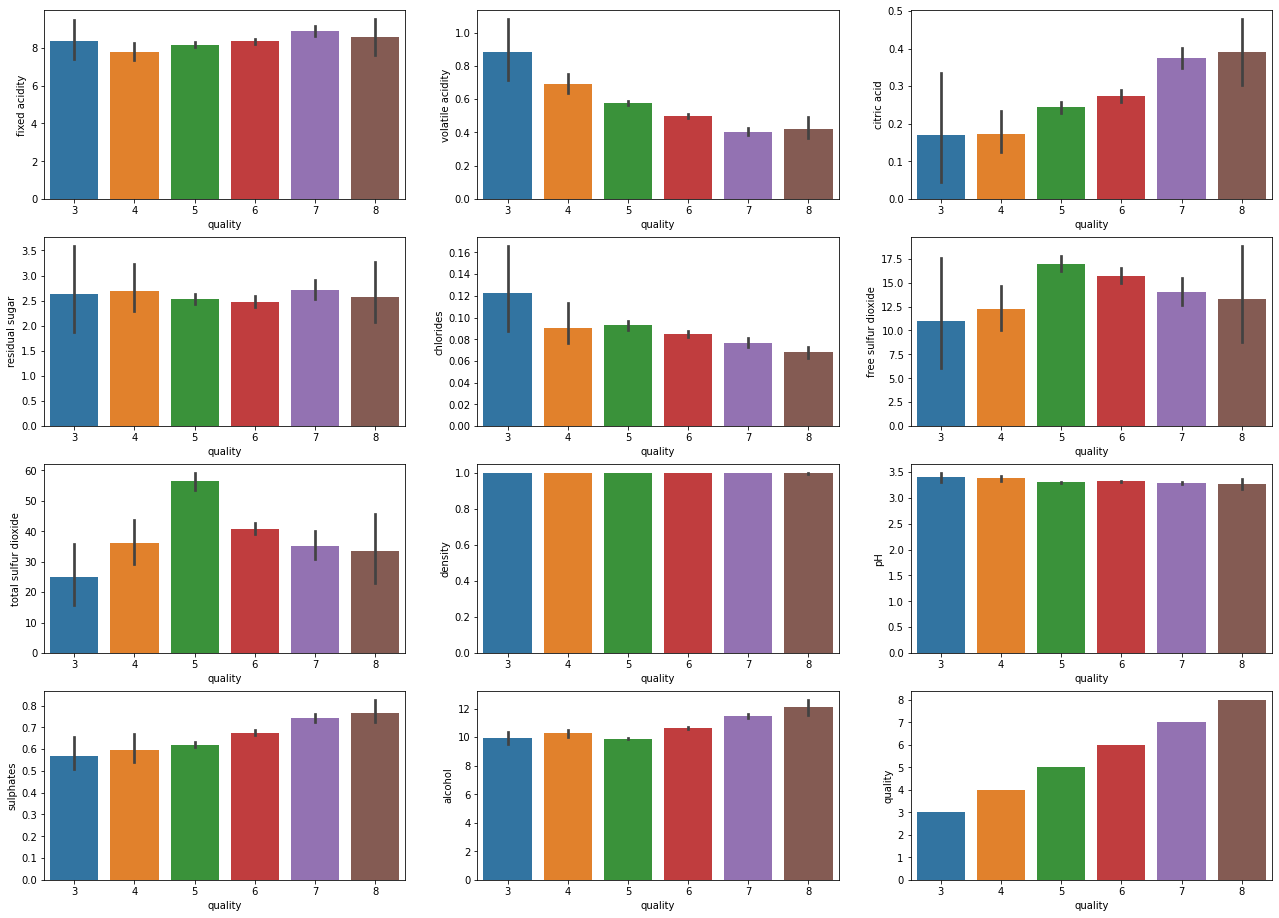

In [17]:
draw_multivariant_plot(dataset,4,3,"bar")

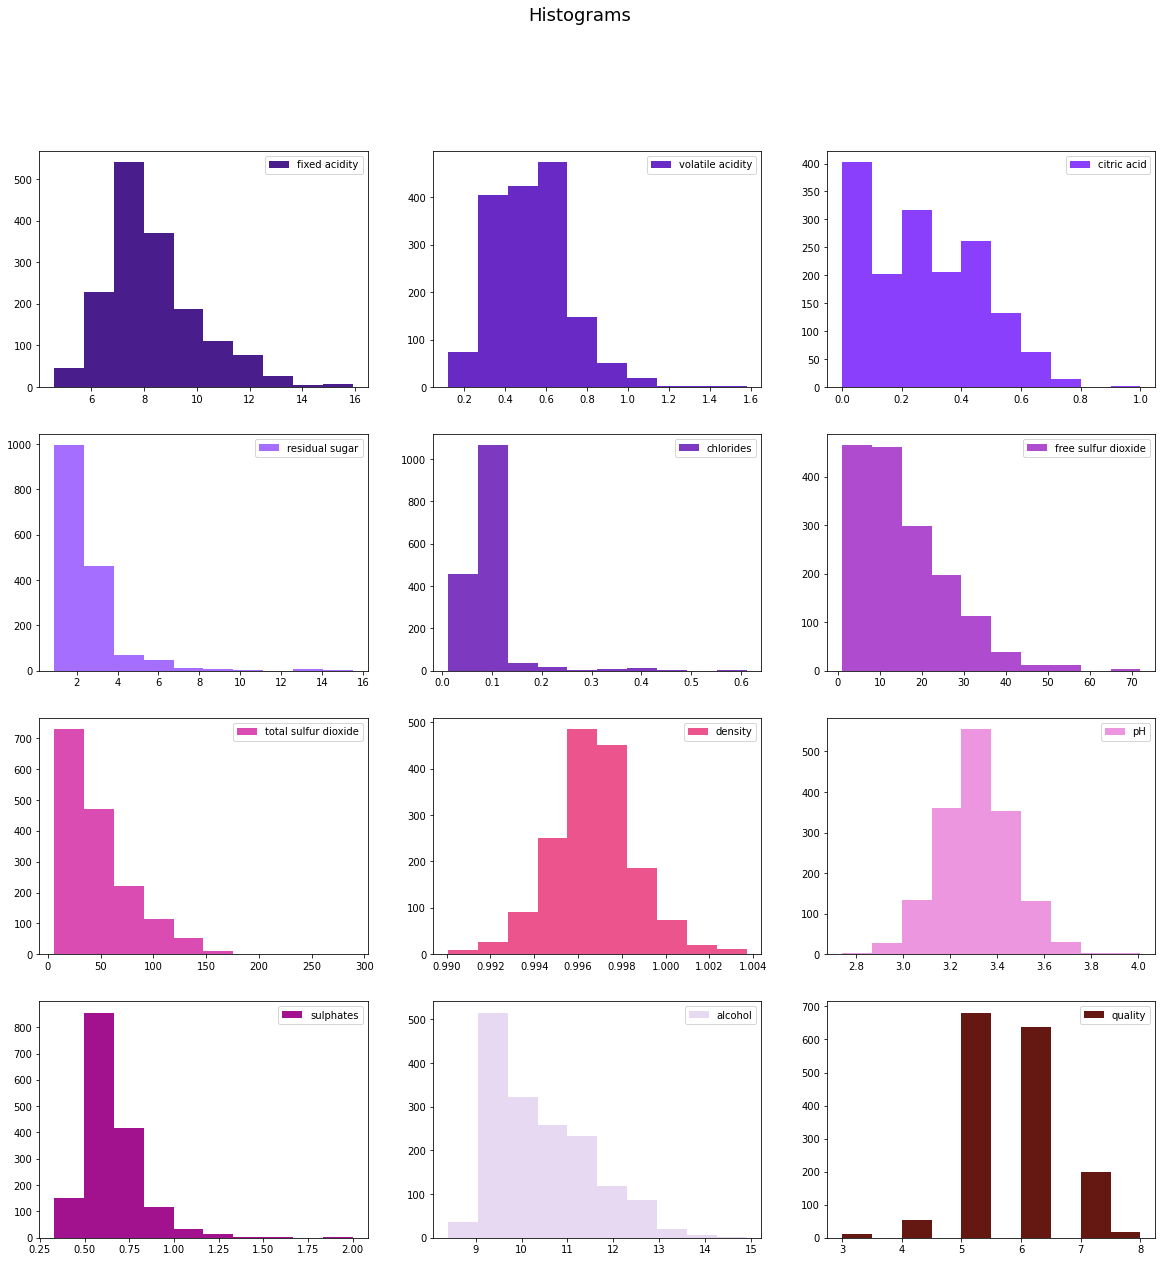

In [18]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(dataset.columns):
    ax = axes.flatten()[index]
    ax.hist(dataset[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

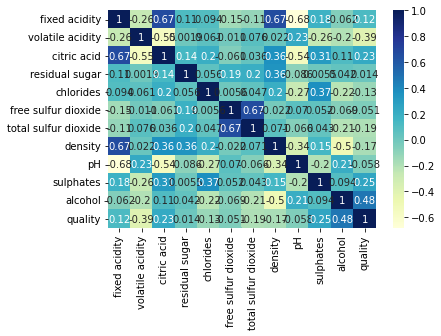

In [19]:
dataplot=sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [20]:
sns.pairplot(dataset, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

Output hidden; open in https://colab.research.google.com to view.

### **Modelling**

In [38]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


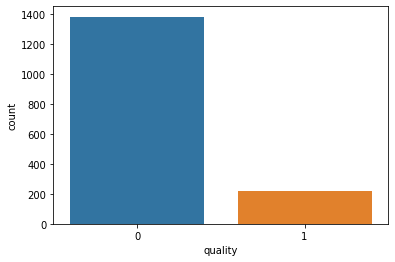

In [39]:
sns.countplot(dataset['quality'])

In [46]:
X=dataset.drop('quality', axis=1)
y=dataset['quality']

X=StandardScaler().fit_transform(X)

Balancing with SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X,y=smote.fit_resample(X,y)

In [48]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

SVM

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       291
           1       0.83      0.90      0.86       262

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.87      0.86      0.86       553



In [51]:
#Finding best parameters for our SVC model
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [52]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.3, 'kernel': 'rbf'}

In [53]:
#best SVM
svc2 = SVC(C = 1.4, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       291
           1       0.96      0.98      0.97       262

    accuracy                           0.97       553
   macro avg       0.97      0.97      0.97       553
weighted avg       0.97      0.97      0.97       553



Decision Tree

In [54]:
tree=DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
pred_tree=tree.predict(X_test)
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.85      0.91      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.89      0.88       553
weighted avg       0.89      0.88      0.88       553



In [55]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [56]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 91,
 'min_samples_split': 4}

In [57]:
#best Decision Tree
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=91, min_samples_split=4)
tree2.fit(X_train, y_train)
pred_tree2 = tree2.predict(X_test)
print(classification_report(y_test, pred_tree2))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       291
           1       0.83      0.90      0.86       262

    accuracy                           0.87       553
   macro avg       0.87      0.87      0.87       553
weighted avg       0.87      0.87      0.87       553



Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       291
           1       0.89      0.97      0.93       262

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



In [59]:
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9443642737760385